# Исследование объявлений о продаже квартир

В данном проекте мы провели исследование данных сервиса Яндекс Недвижимость, используя архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Наша задача заключалась в предобработке данных и анализе для выявления интересных особенностей и зависимостей, характеризующих рынок недвижимости.

В базе данных каждой квартиры содержатся два типа данных: данные, добавленные пользователями, и картографические данные. Первый тип данных включает в себя информацию о площади квартиры, этаже, количестве балконов, а второй тип - расстояния до центра города, аэропорта и ближайшего парка.

### Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Импорт библиотек, данных и их первичное изучение

In [ ]:
import pandas as pd #
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('.../real_estate_data.csv', sep='\t') #
pd.set_option('display.max_columns', None)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19254,13,4900000.0,42.0,2018-09-27T00:00:00,2,2.5,9.0,28.0,7,NaN,False,False,8.0,NaN,Санкт-Петербург,46128.0,19699.0,0.0,NaN,0.0,NaN,30.0
5509,0,3600000.0,42.5,2016-07-01T00:00:00,2,NaN,9.0,28.0,2,NaN,False,False,NaN,0.0,Санкт-Петербург,12731.0,11954.0,1.0,36.0,1.0,924.0,21.0
4590,6,2890000.0,32.7,2018-11-02T00:00:00,1,NaN,27.0,15.4,26,NaN,False,False,8.8,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,38.0
20455,14,16499000.0,94.1,2017-06-30T00:00:00,3,NaN,13.0,38.7,11,NaN,False,False,33.9,1.0,Санкт-Петербург,37412.0,8370.0,1.0,392.0,2.0,359.0,453.0
4810,6,9822904.0,65.5,2018-02-13T00:00:00,2,3.3,5.0,NaN,5,NaN,False,False,21.5,1.0,Санкт-Петербург,17462.0,16465.0,1.0,1205.0,2.0,97.0,441.0


Посмотрим на данные, построив гистограммы все столбцов.

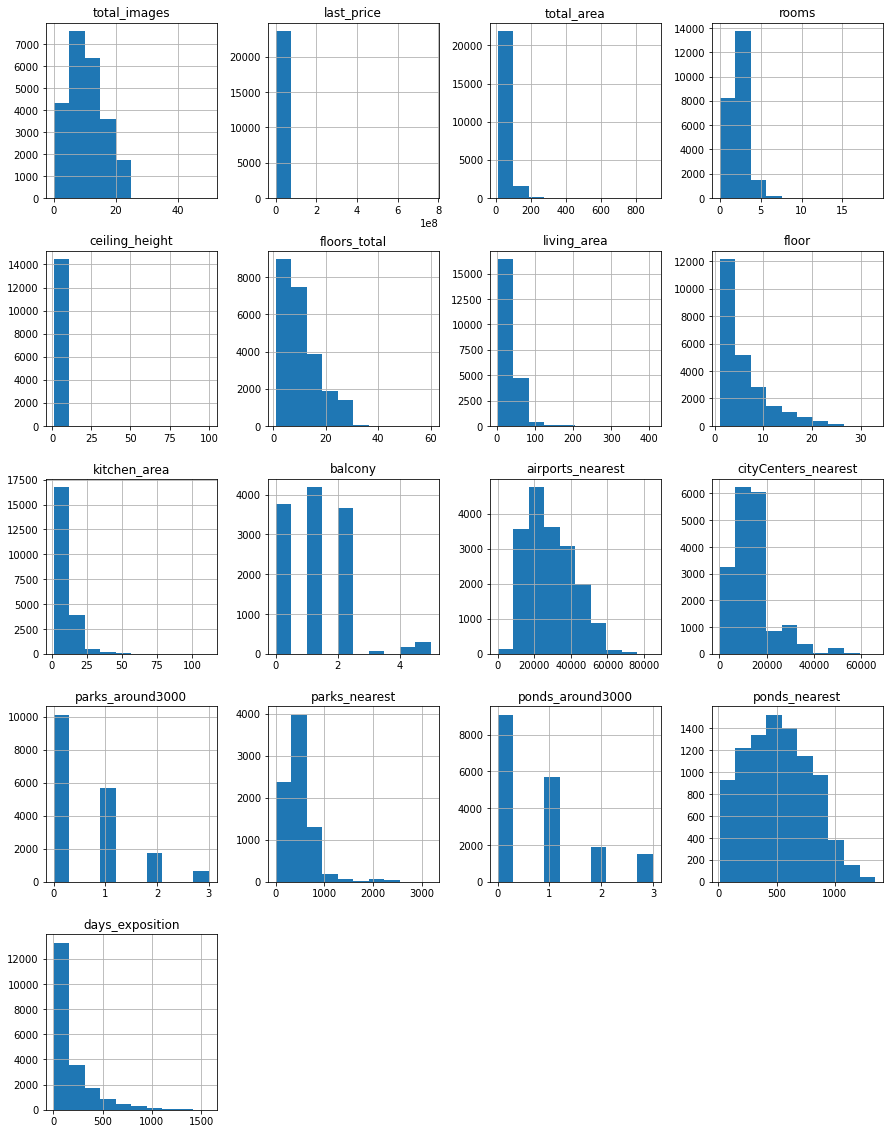

In [ ]:
data.hist(figsize=(15, 20));

Большая часть распределений выглядит правдоподобно. А вот в колонках `last_price`, `total_area` и `ceiling_height` скорее всего есть выбросы. Исследуем данных дополнительно дальше.
А сейчас исследуем пропуски.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что в данных присутсвуют пропуски, и в некоторые признаках есть неккоректные типы данных.
"first_day_exposition" и "days_exposition" нужно превратить в datetime.
"balcony", "parks_nearest", "ponds_nearest" в int,
is_apartment в bool.

Посмотрим количество пропусков.

In [ ]:
data.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

И количество пропусков в процентах от общего числа записей.

In [ ]:
data.isnull().sum().sort_values()/data.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

In [ ]:
data.describe()
print(data['last_price'].max())

763000000.0


Вызывает подозрение количество комнат и высота потолков.
Сделаем срез таблицы и посмотрим на правдоподобность данных по объектам с большим количествам комнат.


In [ ]:
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
20829,6,28659000.0,245.4,2016-03-31T00:00:00,14,NaN,4.0,168.3,2,NaN,False,False,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


Объекты с большим количеством комнат имеют большую площадь и стоят дорого.
Вернемся к вопросу с комнатами в нашем проекте позже.


In [ ]:
data.query('ceiling_height > 10')[['last_price', 'total_area', 'rooms', 'ceiling_height']]

,last_price,total_area,rooms,ceiling_height
355,3600000.0,55.2,2,25.0
3148,2900000.0,75.0,3,32.0
4643,4300000.0,45.0,2,25.0
4876,3000000.0,25.0,0,27.0
5076,3850000.0,30.5,1,24.0
5246,2500000.0,54.0,2,27.0
5669,4400000.0,50.0,2,26.0
5807,8150000.0,80.0,2,27.0
6246,3300000.0,44.4,2,25.0
9379,3950000.0,42.0,3,25.0


Скорее всего ошибка при внесении данных — вместо сантиметров написали метры.
Посмотрим названия населенных пунктов. В названиях есть неявные дубликаты.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В названиях насленных пунктов есть неявные дубликаты.

**Вывод**:

Мы обнаружили наличие значительного количества пропущенных значений в различных столбцах. Для заполнения этих пропусков используем различные стратегии. Например, в случае количества балконов мы заменим пропуски нулевыми значениями, так как предположили, что отсутствие информации о балконах означает их отсутствие. В других случаях, таких как расстояния до аэропорта или наличие пруда, мы оставим пропуски без изменений, поскольку эти данные не были существенными для целей исследования. Для некоторых параметров, где пропущенные значения были значительными, мы используем медианные значения.

### Предобработка данных

Пройдемся по каждому столбцу: обработаем пропуски и в нужных местах заменим тип данных. В начале сделаем копию дата фрейма и будем работать с ней.

In [ ]:
data_prep = data

In [ ]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Приведем `first_day_exposition` к правильному формату `dataTime` и посмотрим, что замена произведена корректно.

In [ ]:
data_prep['first_day_exposition'] = pd.to_datetime(data_prep['first_day_exposition'], format='%Y-%m-%d')
data_prep['first_day_exposition'].head()


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Выше мы обнаружили, что существуют квартиры с аномальной высотой потолков.
Мы предположили, что это связано с тем, что данные были указаны в сантиметрах.
Передвинем запятую влево на один знак у квартир с высотой потолков большей или равной 20 метрам.


In [ ]:
data_prep['ceiling_height'] = data_prep['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)

In [ ]:
Проверим, что получилось.

In [ ]:
data_prep.query('ceiling_height > 10')[['last_price', 'total_area', 'rooms', 'ceiling_height']]

,last_price,total_area,rooms,ceiling_height
15061,5600000.0,56.4,2,14.0
22309,5300000.0,45.0,1,10.3


Заполним пропущенные значения высоты потолков на медиану 2.65, так как основная часть данных в этом столбце находится в небольшом диапазоне

In [ ]:
data_prep['ceiling_height'] = data_prep['ceiling_height'].fillna(2.65)

Заменим пропущенные значени во `floors total` на этаж квартиры.

In [ ]:
data_prep['floors_total'] = np.where(data_prep['floors_total'].isnull(), data_prep['floor'], data_prep['floors_total'])
data_prep['floors_total'] = data_prep['floors_total'].astype('int')

Чтобы заполнить пропуски в 'living_area' посмотрим как распределены данные.

In [ ]:
data.groupby('rooms')['living_area'].agg(['count','mean'])

,count,mean
rooms,,
0,183,18.865246
1,7388,17.893552
2,7296,31.736849
3,5366,47.387941
4,1089,66.983223
5,292,100.009247
6,99,130.983636
7,53,163.564151
8,12,168.683333


Всё логично — чем больше комнат, тем больше квартира. Используем средние значения площади квартиры в зависимости от количества комнат, чтобы заменить пропуски.

In [ ]:
data_prep['living_area'] = data_prep['living_area'].fillna(data_prep.groupby('rooms')['living_area'].transform('mean'))

Размер кухни заменим на 0, предположив, что в этом случае кухня совмещена с жилой комнатой.

In [ ]:
data_prep['kitchen_area'] = data_prep['kitchen_area'].fillna(0)

С балконом предположим тоже самое — если не указан, то его и нет. Заодно сменим у балконов тип float на `integer`.

In [ ]:
data_prep['balcony'] = data_prep['balcony'].fillna(0)

In [ ]:
data_prep['balcony'] = data_prep['balcony'].astype('int')

Проверим, что пробелов нет и данные приведены к нужному типу.

In [ ]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Посмотрим есть ли в датасете полные дубликаты строк.

In [ ]:
print(len(data_prep[data_prep.duplicated()]))

0


Полных дубликатов нет. Поправим неявные дубликаты в названиях населенных пунктов.

In [ ]:
data_prep['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
unique_len = len(data_prep['locality_name'].unique())
print(f'Уникальных населенных пунктов: {unique_len}')

Уникальных населенных пунктов: 365


In [ ]:
data_prep['locality_name'] = data_prep['locality_name'].str.replace('(?:поселок городского типа)|(?:посёлок городского типа)|(?:посёлок)|(?:городской посёлок)|(?:городской поселок)|(?:коттеджный посёлок)', 'поселок', regex=True)

In [ ]:
unique_len = len(data_prep['locality_name'].unique())
print(f'Уникальных населенных пунктов: {unique_len}')

Уникальных населенных пунктов: 322


Были удалены неявные дубликаты (например, "посёлок" и "поселок") в населенных пунктах. Таким образом, количество уникальных населенных пунктов уменьшилось с 365 до 322.

Изучим данные и избавимся от аномальных значений для следующих параметров: площадь квартиры, стоимость, количество комнат.

In [ ]:
data_prep['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

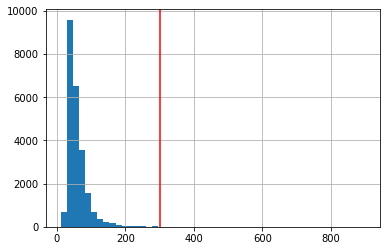

In [ ]:
data_prep['total_area'].hist(bins=50);
plt.axvline(300, c='r');

Всё, что правее красной линии (63 квартиры) — считаем аномалией, которой можно пренебречь.

In [ ]:
data_prep = data_prep.query('total_area < 300')
data_prep['total_area'].describe()

count    23636.000000
mean        59.430665
std         30.461986
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        297.500000
Name: total_area, dtype: float64

In [ ]:
data_prep['last_price'].describe()

count    2.363600e+04
mean     6.301715e+06
std      7.755279e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.615000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

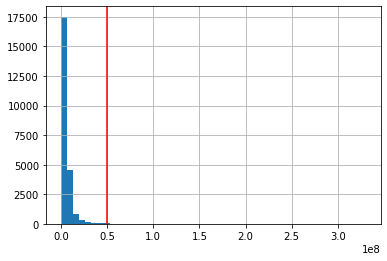

In [ ]:
data_prep['last_price'].hist(bins=50);
plt.axvline(50000000, c='r');

Уберем из дата фрейма аномальные значения.

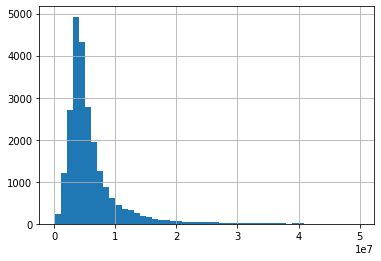

In [ ]:
data_prep = data_prep.query('last_price < 50000000')
data_prep['last_price'].hist(bins=50);

In [ ]:
data_prep['last_price'].describe()

count    2.353300e+04
mean     5.954932e+06
std      4.826167e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.990000e+07
Name: last_price, dtype: float64

Отсечем из нашаего датафрейма 18 квартир с количеством комнат больще 7.

In [ ]:
data_prep['rooms'].value_counts()

1     8046
2     7934
3     5780
4     1143
5      292
0      196
6       84
7       40
8        7
9        4
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64

In [ ]:
data_prep = data_prep.query('rooms < 8')

Проверим сколько данных удалили их датафрейма.

In [ ]:
data_prep.shape[0] / data.shape[0]

0.9922359593231782

Чтобы не потерть многообразие данных, мы удалили только выраженные аномалии. Таким образом, объем данных сократился менее 1%.

<b>Выводы:</b>
Обнаружили пробелы в данных и устранили их по возможности.
<ol>
<li>Обработали пропуски и заменили их оптимальным способом  </li>
<li>В столбцах  `is_apartment` `airports_nearest`  `cityCenters_nearest` `parks_around3000` `parks_nearest` `ponds_around3000` `ponds_around3000` много пропусков, но нет очевидного способа корректно их заменить. Оставим как есть.</li>
<li>Привели к корректному типу данных столбцы `first_day_exposition` `floors_total` `balcony` </li>
<li>Изучили столбцы со стоимостью квартир, количеством комнат и общей площадью и удалили выраженные аномалии. Объем данных сократился меньше, чем на 1%. </li>
</ol>

### Добавление новых признаков

Для проведения анализа добавим в датасет новые признаки:
- цену квадратного метра жилья
- дни недели, месяцы и года размещения объявлений
- категории по этажам квартир.

Добавим цену квадратного метра `price_m `, округлим до 1 знака после запятой.

In [ ]:
data_prep['price_m'] = (data_prep['last_price'] / data_prep['total_area']).round(1)

Добавим новые новые колонки с годом, месяцем и днем.

In [ ]:
data_prep['weekday_exposition'] = data_prep['first_day_exposition'].dt.weekday
data_prep['month_exposition'] = data_prep['first_day_exposition'].dt.month_name()
data_prep['year_exposition'] = data_prep['first_day_exposition'].dt.year

In [ ]:
data_prep.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,March,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,NaN,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,December,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,August,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,June,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,NaN,False,False,9.10,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0,September,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,NaN,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,3,November,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,31.736849,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,3,April,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,NaN,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.8,2,May,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6,February,2017
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,NaN,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.3,3,November,2017


Создадим функцию, которая раздели этажи на три категории (первый, последний и другой) и применим к датафрейму.

In [ ]:
def floor_position(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data_prep['floor_cat'] =  data_prep.apply(floor_position, axis=1)

In [ ]:
data_prep[['floor','floors_total', 'floor_cat']].sample(10)


,floor,floors_total,floor_cat
12413,7,9,другой
13228,2,3,другой
10612,4,4,последний
10111,5,5,последний
12052,1,4,первый
17759,5,25,другой
5768,5,10,другой
13102,8,16,другой
2202,5,12,другой
2806,2,11,другой


Посчитаем и добавим в таблицу расстояние в км до центра города. Округлим значения.

In [ ]:
data_prep['city_centers_distance'] = data_prep['cityCenters_nearest']/1000
data_prep['city_centers_distance'] = data_prep['city_centers_distance'].round()

In [ ]:
data_prep.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday_exposition,month_exposition,year_exposition,floor_cat,city_centers_distance
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,March,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,NaN,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,December,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,August,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,June,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,NaN,False,False,9.10,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0,September,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,NaN,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,3,November,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,31.736849,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,3,April,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,NaN,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.8,2,May,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6,February,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,NaN,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.3,3,November,2017,другой,14.0


Добавили в таблицу данные, которые пригодятся нам в дальнейшем анализе.

<h2>Исследовательский анализ данных</h2>

Изучим и опишем следующие параметры
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

In [ ]:
data_prep.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_m', 'weekday_exposition',
       'month_exposition', 'year_exposition', 'floor_cat',
       'city_centers_distance'],
      dtype='object')

Напишем функцию для описания параметра.

In [ ]:
def describer(column,bins=50, cut=200):
    return [data_prep[column].describe(),
            data_prep.plot(y = column, kind = 'hist', bins = bins, grid=True, figsize = (5,3), range = (0,cut))]

Изучим площади квартир.

[count    23515.000000
 mean        58.693853
 std         28.510408
 min         12.000000
 25%         40.000000
 50%         52.000000
 75%         69.000000
 max        297.500000
 Name: total_area, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

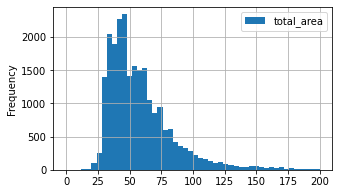

In [ ]:
describer("total_area")

- Средняя площадь квартир составляет примерно 58.69 квадратных метров.
- Минимальная площадь квартиры в выборке составляет 12 квадратных метров, а максимальная - 297.5 квадратных метров.
- 25% квартир имеют площадь менее 40 квадратных метров, 50% квартир имеют площадь менее 52 квадратных метров, и 75% квартир имеют площадь менее 69 квадратных метров.

Изучим жилые площади.

[count    23515.000000
 mean        33.578659
 std         18.468183
 min          2.000000
 25%         18.300000
 50%         30.170000
 75%         42.200000
 max        211.000000
 Name: living_area, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

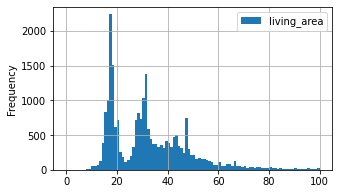

In [ ]:
describer('living_area', 100, 100)

Визуально выделяются три пика: приблизительно в райное 18, 30 и 47 кв. м.
По всей видимости, это особенности типовой советской застройки — площади 1, 2, 3-комнатный квартир.
Изучим площадь кухни.

[count    23515.000000
 mean         9.414716
 std          5.947836
 min          0.000000
 25%          6.300000
 50%          8.900000
 75%         11.300000
 max        100.700000
 Name: kitchen_area, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

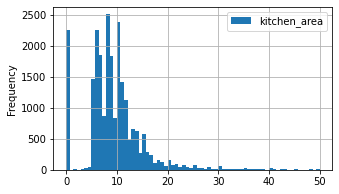

In [ ]:
describer('kitchen_area',70, 50)

При предоработке данных мы приравняли отсутвие данных в столбце `площадь кухни` нулю.
Поэтому неудивительно, что в датасете завышенное количество "студий".


[count    2.351500e+04
 mean     5.941536e+06
 std      4.799509e+06
 min      1.219000e+04
 25%      3.400000e+06
 50%      4.600000e+06
 75%      6.700000e+06
 max      4.990000e+07
 Name: last_price, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

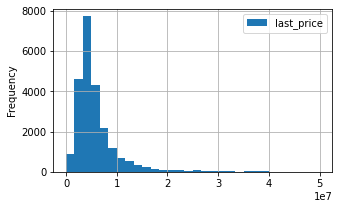

In [ ]:
describer('last_price',30,50000000)

Средняя цена составляет около 5,941,536 рублей, при этом стандартное отклонение достаточно высокое, что указывает на значительную вариабельность цен в выборке.
Посмотрим на количество комнат.

[count    23515.000000
 mean         2.044227
 std          1.012552
 min          0.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max          7.000000
 Name: rooms, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

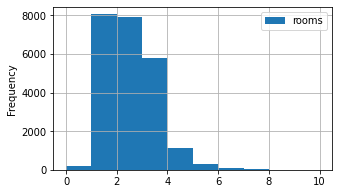

In [ ]:
describer('rooms', 10, 10)

In [ ]:
Большинство квартир однокомнатные и двухкомнатные квартир. Трехкомнатных меньше.

[count    23515.000000
 mean         2.695113
 std          0.245277
 min          1.000000
 25%          2.600000
 50%          2.650000
 75%          2.700000
 max         14.000000
 Name: ceiling_height, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

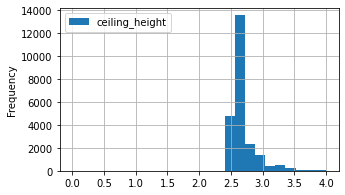

In [ ]:
describer('ceiling_height',25,4)

Значения не очень сильно варьируют (межквартильный размах всего 15 сантиметров). По всей видимости, это связана с тем, что высота потолков обыкновенно регулируется строительными стандартами и экономическими соображениями.

Посмотрим на распредление квартир по этажам.

[count    23515.000000
 mean         5.899553
 std          4.895301
 min          1.000000
 25%          2.000000
 50%          4.000000
 75%          8.000000
 max         33.000000
 Name: floor, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

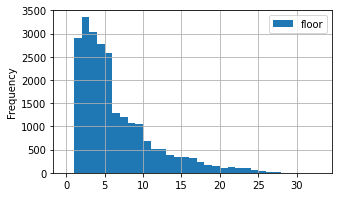

In [ ]:
describer('floor',33,33)

На графике отчетливо выделяются группы с 1 по 5 и с 6 по 9 этажи.
Почему так происходит мы посмотрим дальше. А пока посмотрим распреление квартир по категории этажа.

<AxesSubplot:>

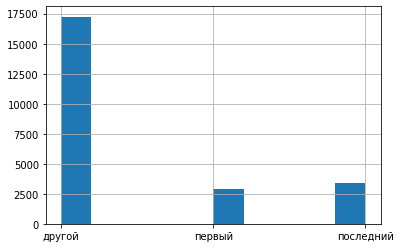

In [ ]:
data_prep['floor_cat'].hist()

In [ ]:
data_prep['floor_cat'].describe()

count      23515
unique         3
top       другой
freq       17244
Name: floor_cat, dtype: object

Учитывая, что медианная количество этажей 9, неудивительно,
что большинство этажей находятся не на первом или последнем этажах.

[count    23515.000000
 mean        10.701212
 std          6.606244
 min          1.000000
 25%          5.000000
 50%          9.000000
 75%         16.000000
 max         60.000000
 Name: floors_total, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

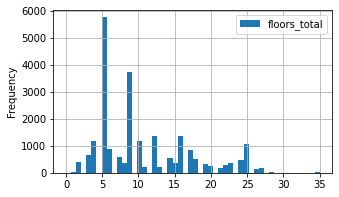

In [ ]:
describer('floors_total',50,35)

В 70-х годах в СССР по нормам градостроительства у зданий првевыщающих пять этажей должен был быть лифт
А у десятиэтажных - два лифта
Вот и результат — большинство домов теперь пятиэтажки и девятиэтажки.

Посмотрим на распредление квартир по близости к центру города.

[count    17999.000000
 mean     14276.663481
 std       8594.929482
 min        181.000000
 25%       9415.500000
 50%      13149.000000
 75%      16333.000000
 max      65968.000000
 Name: cityCenters_nearest, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

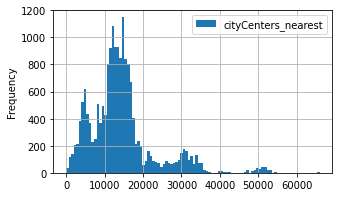

In [ ]:
describer('cityCenters_nearest', 100, 66000)

На графике можно увидеть три категории районов: центр, густозастроенные спальные районы и загород.

[count    7940.000000
 mean      492.316751
 std       342.435831
 min         1.000000
 25%       288.000000
 50%       456.000000
 75%       613.000000
 max      3190.000000
 Name: parks_nearest, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

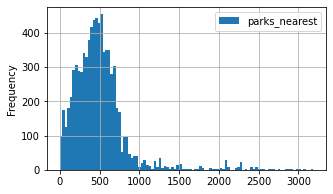

In [ ]:
describer('parks_nearest', 100,3190)

Большинство квартир находятся на расстоянии 288-612 метров от парка.

[count    17978.000000
 mean     28818.257370
 std      12676.274633
 min          0.000000
 25%      18539.000000
 50%      26770.000000
 75%      37364.000000
 max      84869.000000
 Name: airports_nearest, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

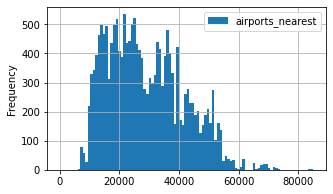

In [ ]:
describer('airports_nearest',100,85000)

Рядом с аэропортом квартир совсем немного. Или люди не надеятся их продать :)
Медианное расстояние от аэропорта — 27 км.

[count    23515.000000
 mean         2.568148
 std          1.789339
 min          0.000000
 25%          1.000000
 50%          3.000000
 75%          4.000000
 max          6.000000
 Name: weekday_exposition, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

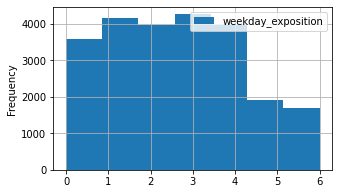

In [ ]:
describer('weekday_exposition',7,6)

Большинство объявлений разместили в четверг, на выходных объявления размещают приблизительно в два раза реже.

In [ ]:
data_prep['month_exposition'].describe()

count        23515
unique          12
top       February
freq          2619
Name: month_exposition, dtype: object

<AxesSubplot:>

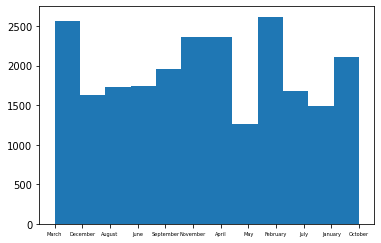

In [ ]:
data_prep['month_exposition'].hist(bins=12, xlabelsize=5, grid = False)

In [ ]:
data_prep['month_exposition'].value_counts()

February     2619
March        2570
April        2359
November     2358
October      2114
September    1964
June         1746
August       1735
July         1675
December     1625
January      1487
May          1263
Name: month_exposition, dtype: int64

Предложение на рынке недвижимости максимально высокое с февраля по апрель, летом спад, осенью снова рост.

<b>Выводы:</b>
<ul>
<li>Обычная площадь квартиры около 50 кв. м.</li>
<li>Больше всего 1 , 2 и 3хкомнатных квартир</li>
<li>Подавляющее большинство квартир квартир имеют высоту потолков 2.6-2.7 метров</li>
<li>Большинство объявлений разместили в четверг, на выходных объявления размещают приблизительно в два раза реже</li>
<li>Большинство квартир продается в спальных густазаселенных районах</li>
<li>Предложение на рынке недвижимости максимально высокое с февраля по апрель, летом спад, осенью снова рост.</li>
</ul>

<p>Изучим какие быстро продаются квартиры.</p>

### Изучим как быстро продавались квартиры

У нас нет достоверных данных о дне когда пользователи продавали квартиры.
Но мы можем попробовать сделать продположения на основании данных о том, сколько дней было размещено объявление.
Для начала изучим сами данные.


[count    20376.000000
 mean       179.918384
 std        218.879438
 min          1.000000
 25%         45.000000
 50%         95.000000
 75%        230.000000
 max       1580.000000
 Name: days_exposition, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

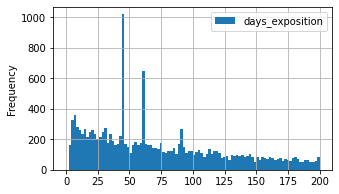

In [ ]:
describer('days_exposition', 100)

Видим три выброса на графике, изучим их подробнее.

In [ ]:
data_prep['days_exposition'].value_counts().head(10)

45.0    879
60.0    538
7.0     233
30.0    208
90.0    199
4.0     176
3.0     158
5.0     149
14.0    145
9.0     142
Name: days_exposition, dtype: int64

Видим аномальное значение в районе  95, 45 и 30 дней. Но это не выбросы, а особенность функционирования системы размещения(https://yandex.ru/support/realty/owner/home/add-ads-housing.html). Осталяем их датасете.

Изучим количество дней, которое размещалось объявление.

[count    20376.000000
 mean       179.918384
 std        218.879438
 min          1.000000
 25%         45.000000
 50%         95.000000
 75%        230.000000
 max       1580.000000
 Name: days_exposition, dtype: float64,
 <AxesSubplot:ylabel='Frequency'>]

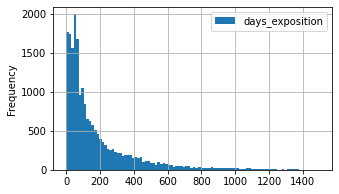

In [ ]:
describer('days_exposition',100,1500)

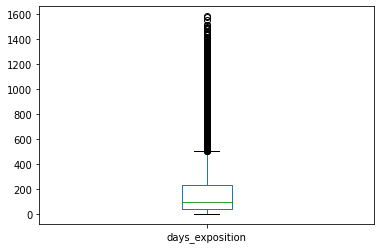

In [ ]:
data_prep['days_exposition'].plot.box();


<li>В среднем квартира продается за 95 дней, продажа выше 230 дней может считаться аномально долгой.</li>

Изучим какие факторы влияют на стоимость квартиры. Для начала построим несколько функций, которые облегчат нам анализ.

In [ ]:
#напишем функцию, которая инетрпретирует коэффицент Пирсона по шкале Чеддока

def p_estimator(p):
    p = abs(p)
    if p >0 and p <=0.3:
        return 'очень слабая'
    if p > 0.3 and p <=0.5:
        return 'слабая'
    if p > 0.5 and p <=0.7:
        return 'средняя'
    if p > 0.7 and p<=0.9:
        return "сильная"
    else:
        return "очень сильная"

#напишем функцию, которая будет строить сводную и помогать смотреть на связь между факторами
def factor_impact(factor, measure="попугаи", estimate='True', pearson = True):
    pivot = data_prep.pivot_table(index = factor, values = 'price_m', aggfunc = ['mean', 'count', 'median'])
    pivot.columns = ['mean', 'count', 'median']
    p = data_prep[factor].corr(data_prep['price_m'])
    message = f"Коэффицент корреляции между двумя факторами составляет {p}, связь {p_estimator(p)}."
    if pearson == True:
        return [pivot.plot(y = 'median', style = 'o', figsize=(7, 3)),
                plt.xlabel(measure),
                plt.ylabel("Цена, м2"),
                message]
    else:
        return [pivot.plot(y = 'median', style = 'o', figsize=(7, 3)),
                plt.xlabel(measure),
                plt.ylabel("Цена, м2")]

[<AxesSubplot:xlabel='Площадь, м2', ylabel='Цена, м2'>,
 Text(0.5, 0, 'Площадь, м2'),
 Text(0, 0.5, 'Цена, м2'),
 'Коэффицент корреляции между двумя факторами составляет 0.19274301506972447, связь очень слабая.']

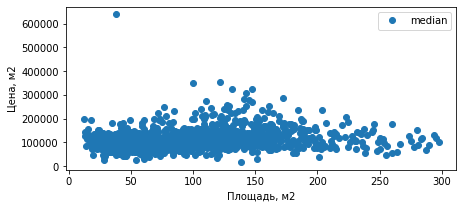

In [ ]:
factor_impact("total_area", 'Площадь, м2')

[<AxesSubplot:xlabel='Площадь, м2', ylabel='Цена, м2'>,
 Text(0.5, 0, 'Площадь, м2'),
 Text(0, 0.5, 'Цена, м2'),
 'Коэффицент корреляции между двумя факторами составляет 0.08696225119558076, связь очень слабая.']

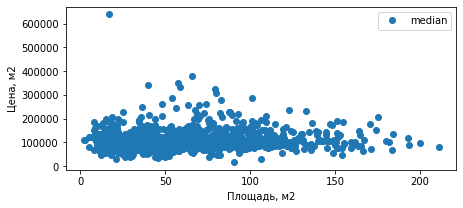

In [ ]:
factor_impact("living_area", 'Площадь, м2')

[<AxesSubplot:xlabel='Площадь, м2', ylabel='Цена, м2'>,
 Text(0.5, 0, 'Площадь, м2'),
 Text(0, 0.5, 'Цена, м2'),
 'Коэффицент корреляции между двумя факторами составляет 0.2815281048360544, связь очень слабая.']

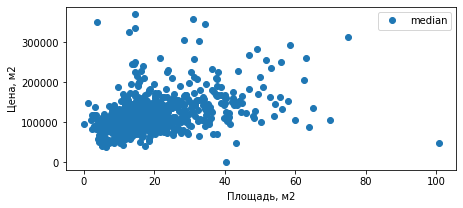

In [ ]:
factor_impact("kitchen_area", 'Площадь, м2')

[<AxesSubplot:xlabel='комнат', ylabel='Цена, м2'>,
 Text(0.5, 0, 'комнат'),
 Text(0, 0.5, 'Цена, м2')]

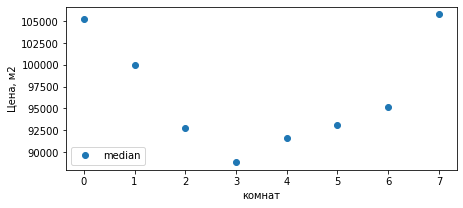

In [ ]:
factor_impact("rooms", 'комнат', pearson=False)

Интересное открытие. Оптимальная с точки зрения покупателя цена за квадратный метр у трехкомнатной квартиры.
На коэффицент корреляции Пирсона смотреть не будем — функция нелинейная.
Посмотрим как цена соотносится с категорией этажа.


<AxesSubplot:xlabel='floor_cat'>

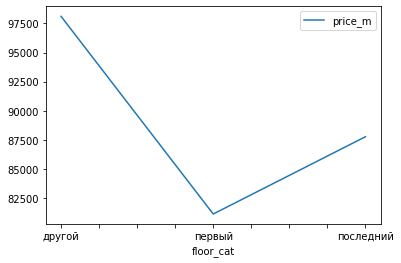

In [ ]:
price_floor = data_prep.pivot_table(index = 'floor_cat', values = 'price_m', aggfunc = 'median')
price_floor.plot()

Самые дешевые квартиры на первом этаж. Квартиры на последнем этаже тоже продаются дешевле, чем квартиры на других этажах

[<AxesSubplot:xlabel='дни недели', ylabel='Цена, м2'>,
 Text(0.5, 0, 'дни недели'),
 Text(0, 0.5, 'Цена, м2')]

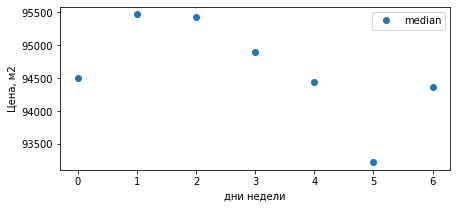

In [ ]:
factor_impact("weekday_exposition", "дни недели", pearson = False)

Дешевле всего цена в субботу. Посмотрим динамику по месяцам.

,mean,count,median
month_exposition,,,
June,96108.468328,1746,92575.40
May,96697.589945,1263,92639.60
December,96599.007015,1625,93877.60
October,96596.023557,2114,94119.20
July,97320.876000,1675,94805.20
February,97100.209431,2619,94898.00
January,98345.549765,1487,95161.30
March,97317.343152,2570,95164.85
September,98083.303004,1964,95509.20


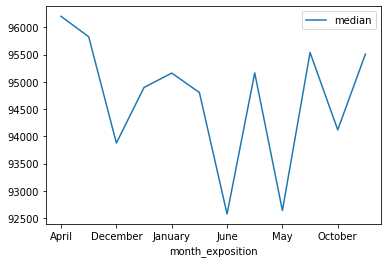

In [ ]:
pt_month = data_prep.pivot_table(index = 'month_exposition', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
pt_month.columns = ['mean', 'count', 'median']
pt_month.plot(y = 'median')
pt_month.sort_values(by='median')

Мы уже видели, что количество объявлений больше всего появляется весной и осенью. Вот одна из возможных прични: летом ниже спрос и ниже цены.

Посмотрем распределение по годам.

[<AxesSubplot:xlabel='год', ylabel='Цена, м2'>,
 Text(0.5, 0, 'год'),
 Text(0, 0.5, 'Цена, м2')]

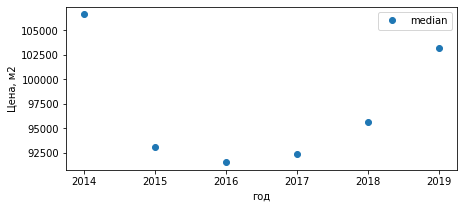

In [ ]:
factor_impact("year_exposition", "год", pearson = False)

Дешевле всего стоили квартиры в 2016 году.
Вывод: если решите купить квартиру в Питере, то начинайте поиск в летнюю субботу. И желательно в 2016 году :)

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Посмотрим на топ самых больших населенных пунктов

In [ ]:
big_cities = data_prep['locality_name'].value_counts()
big_cities.head(11)

Санкт-Петербург      15541
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 367
Колпино                337
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Петергоф               201
Name: locality_name, dtype: int64

Посмотрим как распределяются цены в этих городах.

<AxesSubplot:xlabel='Топ-10 городов', ylabel='Цена, м2'>

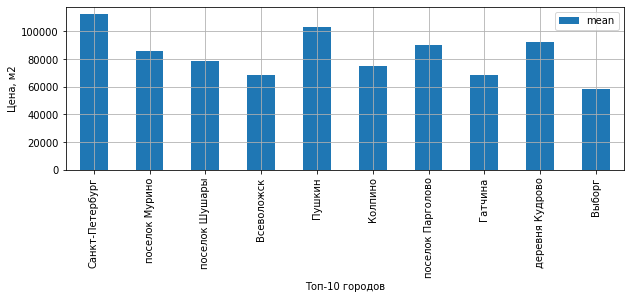

In [ ]:
big_cities_price = data_prep.pivot_table(index = 'locality_name', values = 'price_m', aggfunc=['count', 'mean'])
big_cities_price.columns = ['count', 'mean']
big_cities_price = big_cities_price.sort_values('count', ascending = False).head(10)
big_cities_price.plot(y = 'mean', kind = "bar", grid=True, fontsize=10, xlabel='Топ-10 городов', ylabel='Цена, м2', figsize=(10,3))


Самая высокая стоимасть ожиждаемо в Санкт-Петербурге, но Пушкин не сильно от него отстает.Самая низкая из топ-10 в Выборге.

Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

Узнаем среднюю цену квадратнрого метра жилья в зависимости от расстояния от центра.

In [ ]:
spb = data_prep.query('locality_name == "Санкт-Петербург"')
spb_distanse_price = spb.pivot_table(index = 'city_centers_distance', values = 'price_m',aggfunc = 'mean')
spb_distanse_price.head(10)

,price_m
city_centers_distance,
0.0,192050.504545
1.0,146239.756000
2.0,137207.910490
3.0,118715.324709
4.0,127515.755325
5.0,134970.140363
6.0,140512.325213
7.0,141057.357107
8.0,125097.738721


<AxesSubplot:xlabel='city_centers_distance'>

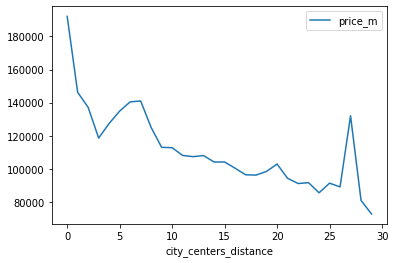

In [ ]:
spb_distanse_price.plot()

In [ ]:
p = spb['city_centers_distance'].corr(spb['price_m'])
print(f"Коэффицент корреляции между двумя факторами составляет {p}, связь {p_estimator(p)}.")


Коэффицент корреляции между двумя факторами составляет -0.3430374970788436, связь слабая.


Существует слабая обратнопропорциональная связь между стоимостью м2 жилья и расстоянием до центра.
Есть интресный пик в районе 27 км. Возможно, там находятся элитные жилые поселки. А возможно, вклад вносит город Пушкин, где, как мы выяснили, цена м2 почти такая же как в Санкт-Петербурге.


### Общий вывод

Мы провели комплексный анализ и обработку архива объявлений о продаже квартир в Санкт-Петербурге и области.

**Предобработка данных**:

- В процессе обработки данных мы заполнили пропущенные значения и привели типы данных к необходимому формату. Также мы удалили выбросы, связанные с ценой квартир, количеством комнат и общей площадью, что привело к незначительному сокращению объема данных (около 1%).

- Для дальнейшего анализа мы добавили в таблицу новые полезные столбцы, включая цену квадратного метра жилья, а также извлекли из даты размещения объявлений информацию о днях недели, месяцах и годах. Также мы создали категории, основанные на этажах квартир.

**Исследователский аналоиз**:

Исследование данных позволило нам выявить ряд наблюдений.

- Большинство объектов недвижимости можно классифицировать по трем группам, соответствующим типичным размерам 1-, 2- и 3-комнатных квартир.
- Мы также обнаружили различия в размещении объявлений в зависимости от дня недели, с наибольшим количеством объявлений в четверг и снижением на выходных.
- Также отмечается сезонность на рынке недвижимости, с пиком предложения в период с февраля по апрель, спадом летом и повторным ростом осенью.

- В среднем продажа квартиры занимает около 95 дней, а срок продажи выше 230 дней может считаться аномально долгим.
- Исследование позволило выявить факторы, оказывающие наибольшее влияние на стоимость квадратного метра жилья, включая количество комнат, этаж квартиры и близость к центру.
- В то же время, день, месяц, год размещения и общая площадь оказывают незначительное влияние на стоимость.
